# Qu1 - Decision Tree Algorithm

In [138]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

## Part-1: training data for the decision tree and finding the accuracy with different H_params

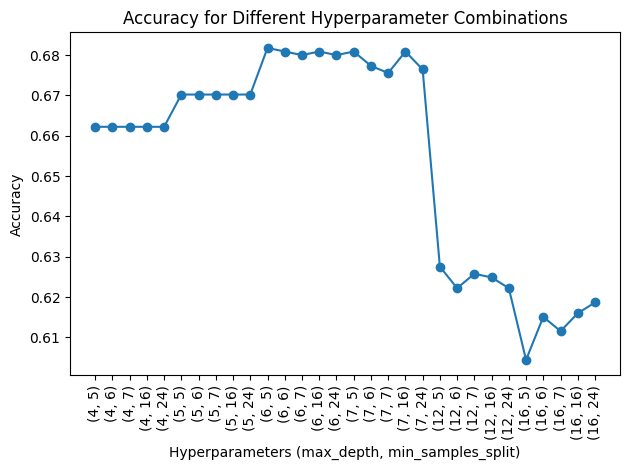

(6, 5)


In [166]:
data_x = np.load("x (1).npy")
data_y = np.load("y.npy")
data_x
max_depth_array = [4, 5, 6, 7, 12, 16]
min_samples_split = [5, 6, 7, 16, 24]

parameters = []
scores = []
X_train, X_test, Y_train, Y_test = train_test_split(data_x, data_y, test_size=0.25, random_state=42)
X_train, X_val, Y_test, Y_test = train_test_split(data_x, data_y, test_size=0.25, random_state=42)

for max_d in max_depth_array:
    for min_s in min_samples_split:
            clf = tree.DecisionTreeClassifier(     
                    max_depth= max_d,           
                    min_samples_split= min_s   
                )
            clf = clf.fit(X_train, Y_train)
            y_pred = clf.predict(X_test)
            score = accuracy_score(Y_test, y_pred)
            scores.append(score)
            parameters.append((max_d, min_s))
            
            
x_ticks = np.arange(len(parameters))

plt.plot(x_ticks, scores, marker='o')
plt.xticks(x_ticks, parameters, rotation='vertical')
plt.xlabel('Hyperparameters (max_depth, min_samples_split)')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Hyperparameter Combinations')

max_accuracy = max(scores)
max_index = scores.index(max_accuracy)
max_parameter = parameters[max_index]

plt.tight_layout()
plt.show()
print(parameters[max_index])

### Analyzing the results of the accuracy of the model

Here as we can see from the results on this set of data and Decision tree model, we find out that the model overfits when the max_depth of the tree increases because, the model works very well on training data but it doesn't find the actual pattern of the data so when we inject the test data to the model, the accuracy decreases. but we should notice that increasing the depth might be a good idea until depth 7 or 8 but the higher we go from here, the more accuracy decreases.
on splitting the data, we can't find an ideal and fixed value but a number around 6-10 is good for this dataset.

In [140]:
data_y
print(np.unique(data_y))
len(data_x[0])

[0 1 2 3]


40

## Part-2: RandomForest and GradientBoosting

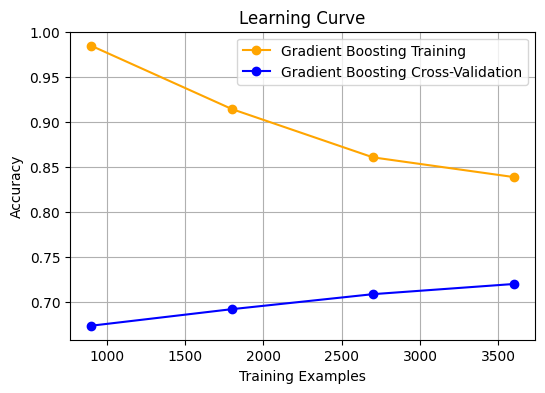

In [177]:
gb_classifier = GradientBoostingClassifier()
train_sizes_abs, train_scores, test_scores = learning_curve(gb_classifier, data_x, data_y, scoring='accuracy', train_sizes=np.linspace(0.25, 1.0, 4))
gb_train_scores_mean = np.mean(train_scores, axis=1)
gb_test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes_abs, gb_train_scores_mean, 'o-', color='orange', label='Gradient Boosting Training')
plt.plot(train_sizes_abs, gb_test_scores_mean, 'o-', color='blue', label='Gradient Boosting Cross-Validation')

plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

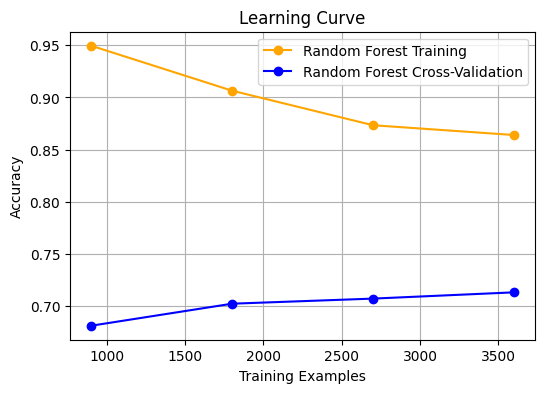

In [176]:

rf_classifier = RandomForestClassifier(max_depth=10, n_estimators=50, min_samples_split=8)
train_sizes_abs, train_scores, test_scores = learning_curve(rf_classifier, data_x, data_y, scoring='accuracy', train_sizes=np.linspace(0.25, 1.0, 4))
rf_train_scores_mean = np.mean(train_scores, axis=1)
rf_test_scores_mean = np.mean(test_scores, axis=1)

# Plotting the learning curve
plt.figure(figsize=(6, 4))
plt.plot(train_sizes_abs, rf_train_scores_mean, 'o-', color='orange', label='Random Forest Training')
plt.plot(train_sizes_abs, rf_test_scores_mean, 'o-', color='blue', label='Random Forest Cross-Validation')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

### the results analysis for the learning curve 

here we can see that having more data to train is better because if we don't have enough data to train, the variance increases and causes the model to overfit. the model will be fixed on the training set and its accuracy will be higher but the test score is incredibly low due to the overfit but when we have more data, the classifier starts to generalize so we will have a better training step because the model will be trained based on more data and doesn't overfit, so in conclusion, we have a better accuracy for the test set, too.
both each learning curves' changes and the difference between different datasets show that having more data to train would be a better idea

# Qu2 - KNN Algorithm

In [107]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [108]:
from sklearn.preprocessing import OneHotEncoder

In [109]:
data = pd.read_csv('Disease_symptom_and_patient_profile_dataset (1).csv')
data.columns = data.columns.str.strip()

In [110]:
data.head()


,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


## Part-1 : Pre-Proccessing the Data

In [111]:
unique_values = data['Disease'].unique()
len(unique_values)

116

In [112]:
data = pd.get_dummies(data, columns=['Gender','Disease'], prefix=['gen','Disease'], dtype=int, drop_first=True)
data.insert(6, 'gen_Male', data.pop('gen_Male'))
data.insert(123, 'Outcome Variable', data.pop('Outcome Variable'))

In [113]:
data.head(10)

,Fever,Cough,Fatigue,Difficulty Breathing,Age,Blood Pressure,gen_Male,Cholesterol Level,Disease_Allergic Rhinitis,Disease_Alzheimer's Disease,...,Disease_Tourette Syndrome,Disease_Tuberculosis,Disease_Turner Syndrome,Disease_Typhoid Fever,Disease_Ulcerative Colitis,Disease_Urinary Tract Infection,Disease_Urinary Tract Infection (UTI),Disease_Williams Syndrome,Disease_Zika Virus,Outcome Variable
0,Yes,No,Yes,Yes,19,Low,0,Normal,0,0,...,0,0,0,0,0,0,0,0,0,Positive
1,No,Yes,Yes,No,25,Normal,0,Normal,0,0,...,0,0,0,0,0,0,0,0,0,Negative
2,No,Yes,Yes,No,25,Normal,0,Normal,0,0,...,0,0,0,0,0,0,0,0,0,Negative
3,Yes,Yes,No,Yes,25,Normal,1,Normal,0,0,...,0,0,0,0,0,0,0,0,0,Positive
4,Yes,Yes,No,Yes,25,Normal,1,Normal,0,0,...,0,0,0,0,0,0,0,0,0,Positive
5,Yes,No,No,No,25,Normal,0,Normal,0,0,...,0,0,0,0,0,0,0,0,0,Positive
6,Yes,Yes,Yes,Yes,25,Normal,0,Normal,0,0,...,0,0,0,0,0,0,0,0,0,Positive
7,Yes,Yes,Yes,Yes,25,Normal,0,Normal,0,0,...,0,0,0,0,0,0,0,0,0,Positive
8,No,Yes,No,No,28,Normal,0,Normal,0,0,...,0,0,0,0,0,0,0,0,0,Negative
9,No,Yes,No,No,28,Normal,0,Normal,0,0,...,0,0,0,0,0,0,0,0,0,Negative


In [114]:
data['Fever'] = data['Fever'].map({'Yes': 1, 'No': 0})
data['Cough'] = data['Cough'].map({'Yes': 1, 'No': 0})
data['Fatigue'] = data['Fatigue'].map({'Yes': 1, 'No': 0})
data['Difficulty Breathing'] = data['Difficulty Breathing'].map({'Yes': 1, 'No': 0})
data['Outcome Variable'] = data['Outcome Variable'].map({'Positive': 1, 'Negative': 0})
data['Blood Pressure'] = data['Blood Pressure'].map({'Low': 0, 'Normal': 1, 'High': 2})
data['Cholesterol Level'] = data['Cholesterol Level'].map({'Low': 0, 'Normal': 1, 'High': 2})

In [115]:
data.head(20)

,Fever,Cough,Fatigue,Difficulty Breathing,Age,Blood Pressure,gen_Male,Cholesterol Level,Disease_Allergic Rhinitis,Disease_Alzheimer's Disease,...,Disease_Tourette Syndrome,Disease_Tuberculosis,Disease_Turner Syndrome,Disease_Typhoid Fever,Disease_Ulcerative Colitis,Disease_Urinary Tract Infection,Disease_Urinary Tract Infection (UTI),Disease_Williams Syndrome,Disease_Zika Virus,Outcome Variable
0,1,0,1,1,19,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,1,0,25,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,25,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,25,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,0,1,25,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,1,0,0,0,25,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
6,1,1,1,1,25,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7,1,1,1,1,25,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,1,0,0,28,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,28,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Part-2 : Implementing KNN Algorithm

In [116]:
def dist(x, y):
    return np.linalg.norm(x-y)

In [117]:
def knn(k, dataset, v):
    v2data = [dist(v, data.iloc[i, 0:122].to_numpy().astype('float64')) for i in dataset.index ]
    sorted =  np.argsort(v2data)    
    l = [dataset.iloc[i, 123] for i in sorted[:k]]    
    return max(l, key=l.count)


## Part-3: Calculating the Accuracy of the Model

In [118]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [119]:
X = [x for x in (data.iloc[i, 0:122].to_numpy() for i in data.index)]
Y = [y for y in (data.iloc[i, 123] for i in data.index)]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, random_state=42)

Y_pred = [knn(8, data, x) for x in X_test]

accuracy_score(Y_test, Y_pred)


0.7804878048780488

## Part-4: Plotting the ROC curve

The ROC curve is used to see how well the model is performing. for doing so, it calculates True positive rate which is the TP / (TP + FN) and false positive rate which is FP / (FP + TN). the ROC shows these rate in all classification Thresholds, if the Threshold decreases, it increases True positive rate but because the positive data also increases, it causes the False positive rate to increase, too. we need to have a trade-off so the best Threshold would be 0.5.
now ROC curve shows whether the TPR is higher than FPR in all threshold classifications or not. therefore if the area under the curve(AUC) is near to 1, then the model is performing well and normal.

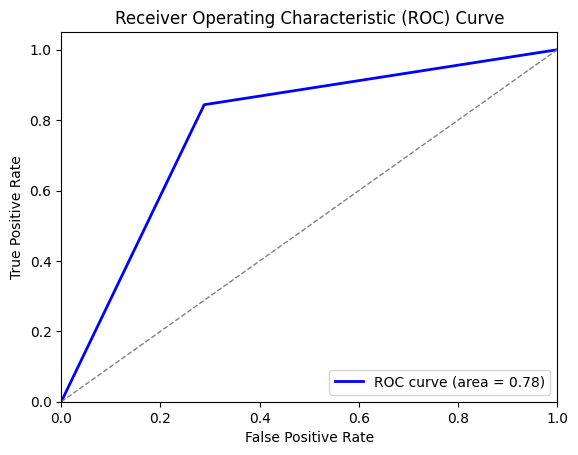

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()